# Exercise 2 using Python

## Import

*   using data ecommerce event dan user profile.
*   import library pandas to analyze data.
*   import io module for dealing with various types of I/O.
*   import matplotlib.pyplot for creating static, animated, and interactive visualizations.
*   import library numpy for scientific computing.


In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files

uploaded = files.upload()
df_ecommerce = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

Saving ecommerce_event.csv to ecommerce_event.csv


In [ ]:
uploaded_2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded_2['user_profile.csv']))

Saving user_profile.csv to user_profile.csv


## DATA

*   df_ecommerce = ecommerce_event.csv
*   df_user = user_profile.csv



## 1. Compare the **revenue** for each **category** using bar chart, sorted by highest revenue

In [ ]:
df_ecommerce_category = df_ecommerce.loc[df_ecommerce['event_type'] == 'purchase'].groupby('category', as_index = False).agg(revenue = ('price', 'sum')).sort_values('revenue', ascending= False)

In [ ]:
df_ecommerce_category

,category,revenue
5,electronics,130933.02
1,appliances,10406.17
3,computers,4947.25
6,furniture,549.20
8,sport,478.52
0,apparel,458.19
4,construction,455.49
2,auto,406.87
7,kids,105.48


**Notes**

---
To find the revenue for each category, filter data df_ecommerce with **event_type = purchase** and **group by category**. using aggregate to **sum price** then sort the values in **descending** order.

we can see that the **highest revenue** is in the **electronics category** with total revenue 130933.02 and the **lowest revenue** is in the **kids category** with total revenue 105.48.


Text(0, 0.5, 'Revenue')

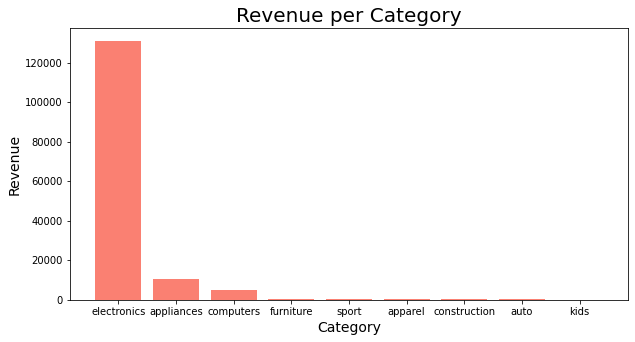

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.bar(df_ecommerce_category['category'], df_ecommerce_category['revenue'], color = 'salmon' )
ax.set_title("Revenue per Category", fontsize=20) 
ax.set_xlabel('Category', fontsize=14)  
ax.set_ylabel('Revenue', fontsize=14)  

## 2. Compare the **revenue** for each **brand** in smartphone **subcategory** using bar chart

In [ ]:
df_ecommerce_brand =df_ecommerce.loc[(df_ecommerce['event_type'] == 'purchase') & (df_ecommerce['subcategory'] == 'smartphone')].groupby('brand', as_index = False).agg(revenue = ('price', 'sum')).sort_values('revenue')

In [ ]:
df_ecommerce_brand

,brand,revenue
9,zte,154.40
7,tp-link,159.33
2,nokia,180.08
6,sony,385.60
3,oneplus,838.89
4,oppo,1667.22
1,huawei,4141.72
8,xiaomi,5937.67
5,samsung,32847.58
0,apple,72803.79


**Notes**

---
To find the revenue for each brand in smartphone subcategory, filter data df_ecommerce with **event_type = purchase** and **subcategory = smartphone** then **group by brand**. using aggregate to **sum price** .

we can see that the **highest revenue** is brand **apple** with total revenue 72803.79 and the **lowest revenue** is brand **zte** with total revenue 154.40.


Text(0, 0.5, 'Brand')

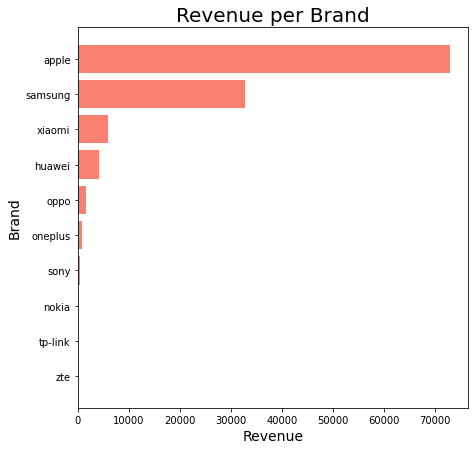

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7)) 
ax.barh(df_ecommerce_brand['brand'], df_ecommerce_brand['revenue'], color = 'salmon')  
ax.set_title("Revenue per Brand", fontsize=20) 
ax.set_xlabel('Revenue', fontsize=14)  
ax.set_ylabel('Brand', fontsize=14)  

## 3. Compare the **total session** view for each **gender** using bar chart, and change the color into green

In [ ]:
df_merge_data = pd.merge(df_ecommerce, df_user, how = 'left', on= 'user_id')
df_merge_total_session =df_merge_data.loc[(df_merge_data['event_type'] == 'view')].groupby('gender', as_index = False).agg(total_session = ('user_session', 'nunique'))

In [ ]:
df_merge_total_session

,gender,total_session
0,Female,9359
1,Male,9501


**Notes**

---
To find the total session for each gender we need to **join/merge** data df_ecommerce and df_user. Filter merged data with **event_type = view** then **group by gender**. using aggregate to **count unique user_session**.

we can see that the **female** have **9395 total session** anda **male** have **9501 total session**.


Text(0, 0.5, 'Total Session')

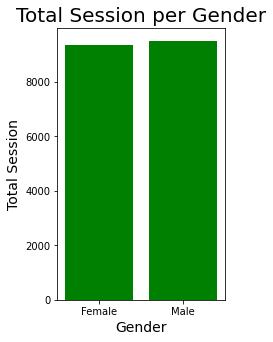

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5)) 
ax.bar(df_merge_total_session['gender'], df_merge_total_session['total_session'], color = 'green')  
ax.set_title("Total Session per Gender", fontsize=20) 
ax.set_xlabel('Gender', fontsize=14)  
ax.set_ylabel('Total Session', fontsize=14)  


## 4. Show the distribution of **electronics** category **price** using histogram

In [ ]:
df_electronics_price =df_ecommerce.loc[(df_ecommerce['category'] == 'electronics')]

In [ ]:
df_electronics_price

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35
5,2019-10-07,view,1005139,electronics,smartphone,apple,2110.45,522360414,dcbd9c4e-eb4b-42a2-8cc2-d6e2e561b780
...,...,...,...,...,...,...,...,...,...
19994,2019-10-17,view,1005212,electronics,smartphone,samsung,223.66,551679876,5cf28a7a-1b41-427b-8681-0429007ce877
19996,2019-10-26,view,1005135,electronics,smartphone,apple,1700.48,554915530,fa961f30-0f9c-471f-9b14-92df6382214b
19997,2019-10-12,view,1004720,electronics,smartphone,huawei,126.90,515961689,15444f60-ca57-4dd4-8f12-41823ea34204
19998,2019-10-26,view,1000978,electronics,smartphone,samsung,333.49,564389353,ac9f591a-ddc9-4cd7-a9b7-9f55c7518ca7


**Notes**

---
To find the distribution of electronics category price, filter data df_ecommerce with **category=electronics**

from histogram we can see that is right skewed/positively skewed that means the highest electronics distribution is the one with the lowest price.

Text(0.5, 0, 'Price')

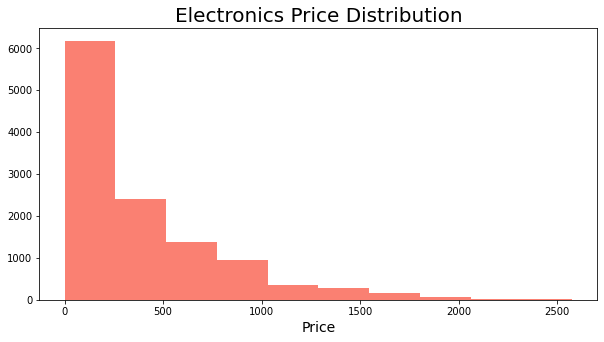

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_electronics_price['price'], color='salmon')  
ax.set_title("Electronics Price Distribution", fontsize=20) 
ax.set_xlabel('Price',fontsize=14)    


## 5. Show the distribution of **apple price** using histogram

In [ ]:
df_apple_price =df_ecommerce.loc[(df_ecommerce['brand'] == 'apple')]

In [ ]:
df_apple_price

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
5,2019-10-07,view,1005139,electronics,smartphone,apple,2110.45,522360414,dcbd9c4e-eb4b-42a2-8cc2-d6e2e561b780
15,2019-10-12,view,4804055,electronics,audio,apple,191.59,559186776,40ca9904-7b57-44ba-9744-036ed8b6aada
17,2019-10-11,view,1005143,electronics,smartphone,apple,1567.30,558089373,e9347be1-413f-4c1c-81ff-609d499cc920
...,...,...,...,...,...,...,...,...,...
19977,2019-10-22,cart,4804056,electronics,audio,apple,160.22,553912468,6ad94bb3-7111-42be-9028-9e41dc7061dc
19978,2019-10-29,view,4804056,electronics,audio,apple,159.80,512738540,ed775c6e-503d-4efc-bf79-3fd5ebd00b06
19990,2019-10-23,view,1004258,electronics,smartphone,apple,731.47,514060756,c9bf583b-c953-44ae-a28a-6620bb30f5dd
19993,2019-10-09,view,1004243,electronics,smartphone,apple,733.84,525032751,a0d27075-b36e-4f88-b38f-7c1f7ff701f3


**Notes**

---
To find the distribution of brand apple price, filter data df_ecommerce with **brand=apple**

from histogram we can see that the highest distribution is in the range price 500 - 1000.


Text(0.5, 0, 'Price')

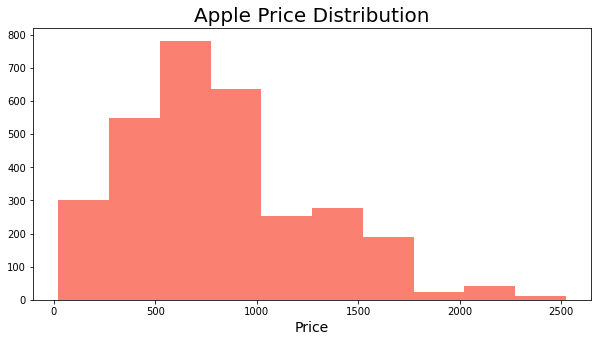

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_apple_price['price'], color='salmon')  
ax.set_title("Apple Price Distribution", fontsize=20) 
ax.set_xlabel('Price', fontsize=14)    


## 6. Compare the price distribution from each **brand** in smartphone **subcategory** using box plot

In [ ]:
df_smartphone_price =df_ecommerce.loc[(df_ecommerce['subcategory'] == 'smartphone')]

In [ ]:
df_smartphone_price

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
5,2019-10-07,view,1005139,electronics,smartphone,apple,2110.45,522360414,dcbd9c4e-eb4b-42a2-8cc2-d6e2e561b780
8,2019-10-14,cart,1004750,electronics,smartphone,samsung,196.80,559982276,24827823-b5cd-4f98-9c6c-6c835cc9c7ee
...,...,...,...,...,...,...,...,...,...
19994,2019-10-17,view,1005212,electronics,smartphone,samsung,223.66,551679876,5cf28a7a-1b41-427b-8681-0429007ce877
19996,2019-10-26,view,1005135,electronics,smartphone,apple,1700.48,554915530,fa961f30-0f9c-471f-9b14-92df6382214b
19997,2019-10-12,view,1004720,electronics,smartphone,huawei,126.90,515961689,15444f60-ca57-4dd4-8f12-41823ea34204
19998,2019-10-26,view,1000978,electronics,smartphone,samsung,333.49,564389353,ac9f591a-ddc9-4cd7-a9b7-9f55c7518ca7


**Notes**

---
To find the distribution of each brand in subcategory smartphone price, filter data df_ecommerce with **subcategory=smartphone**


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


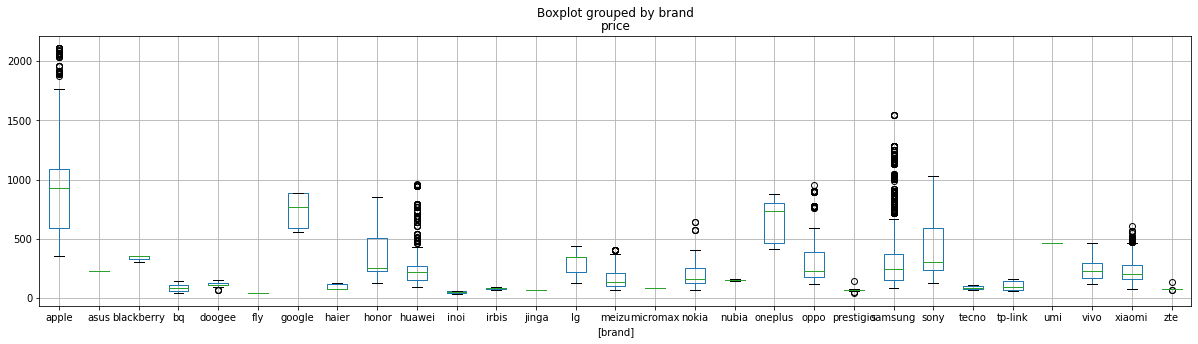

In [ ]:
df_smartphone_price.boxplot(column =['price'], by = ['brand'], figsize =(20,5))

## 7. Show the relationship between **age** and **price** using scatter plot

In [ ]:
df_relation_age_price = pd.merge(df_ecommerce, df_user, how = 'left', on= 'user_id')

In [ ]:
df_relation_age_price

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session,gender,age
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75,Female,28
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df,Female,52
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d,Female,65
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1,Female,38
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35,Male,74
...,...,...,...,...,...,...,...,...,...,...,...
19995,2019-10-07,view,2500360,appliances,kitchen,bosch,321.59,557328227,caefdfec-7091-4e97-be76-d8e291905c5d,Male,52
19996,2019-10-26,view,1005135,electronics,smartphone,apple,1700.48,554915530,fa961f30-0f9c-471f-9b14-92df6382214b,Female,53
19997,2019-10-12,view,1004720,electronics,smartphone,huawei,126.90,515961689,15444f60-ca57-4dd4-8f12-41823ea34204,Female,23
19998,2019-10-26,view,1000978,electronics,smartphone,samsung,333.49,564389353,ac9f591a-ddc9-4cd7-a9b7-9f55c7518ca7,Female,60


**Notes**

---
To find the relationship between age and price we need to **join/merge** data df_ecommerce and df_user. 

from the scatter plot we can see that for the price range 0 - 1000 dominated by almost all age groups


Text(0, 0.5, 'Price')

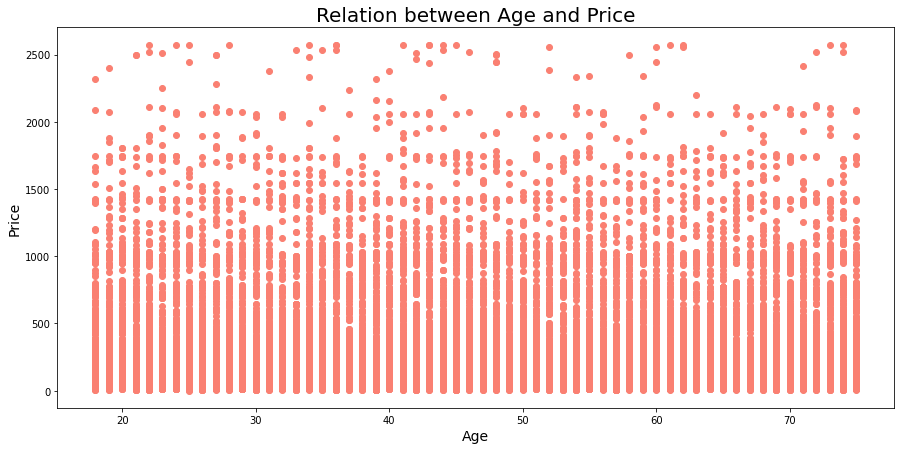

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7)) 
ax.scatter(df_relation_age_price['age'], df_relation_age_price['price'], color='salmon')  
ax.set_title("Relation between Age and Price" , fontsize=20) 
ax.set_xlabel('Age' , fontsize=14)    
ax.set_ylabel('Price', fontsize=14)    

## 8. Show the conversion rate **(total session purchase/total session view)** per day using line chart

In [ ]:
df_daily_purchase =df_ecommerce.loc[df_ecommerce['event_type'] == 'purchase'].groupby('event_date', as_index = False).agg(total_purchase = ('user_session', 'nunique'))

df_daily_session =df_ecommerce.loc[df_ecommerce['event_type'] == 'view'].groupby('event_date', as_index = False).agg(total_session = ('user_session', 'nunique'))

df_merge_daily = pd.merge(df_daily_purchase, df_daily_session,  how = 'inner', on= 'event_date').sort_values('event_date')

df_merge_daily['conversion_rate'] = df_merge_daily['total_purchase']/df_merge_daily['total_session']

In [ ]:
df_merge_daily

,event_date,total_purchase,total_session,conversion_rate
0,2019-10-01,6,591,0.010152
1,2019-10-02,8,511,0.015656
2,2019-10-03,12,525,0.022857
3,2019-10-04,21,662,0.031722
4,2019-10-05,15,622,0.024116
5,2019-10-06,13,558,0.023297
6,2019-10-07,10,550,0.018182
7,2019-10-08,16,560,0.028571
8,2019-10-09,11,572,0.019231
9,2019-10-10,17,591,0.028765


**Notes**

---
* filter data df_ecommerce in **event_type = purchase** group by **event_date** and using aggregate function to count unique user_session (df_daily_purchase).
* filter data df_ecommerce in **event_type = view** group by **event_date** and using aggregate function to count unique user_session (df_daily_session)
* then merge the df_daily_purchase and df_daily_purchase and count conversion rate (df_merge_daily['total_purchase']/df_merge_daily['total_session'])

from the chart we can see that the highest conversion rate at the date 2019-10-16 with conversion rate 0.035541 and the lowest at the date 2019-10-11  with conversion rate 0.007564


Text(0, 0.5, 'Conversion Rate')

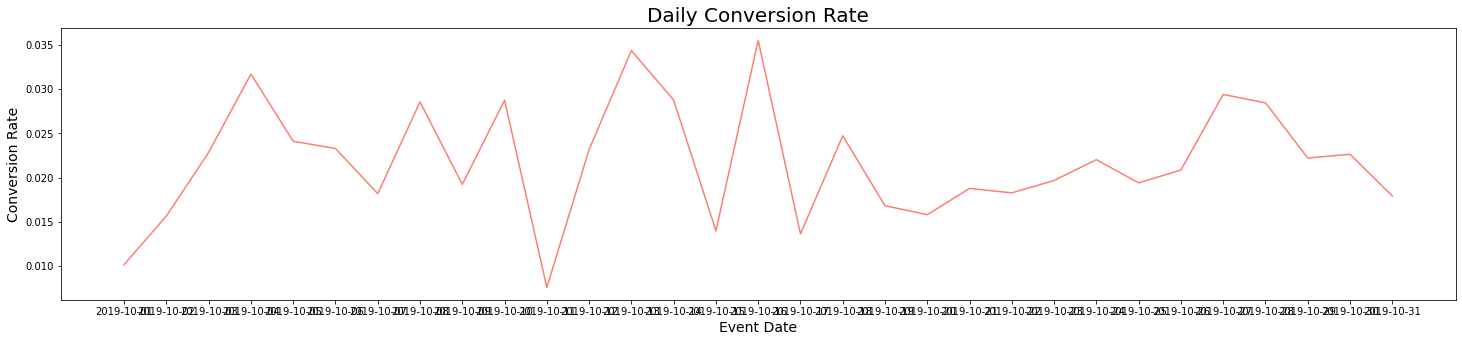

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5)) 
ax.plot(df_merge_daily['event_date'], df_merge_daily['conversion_rate'], color='salmon')  
ax.set_title("Daily Conversion Rate", fontsize=20) 
ax.set_xlabel('Event Date', fontsize=14)  
ax.set_ylabel('Conversion Rate', fontsize=14)  


## 9. Show the top **category** with highest conversion rate **(total purchase/total view)** all time

In [ ]:
df_purchase_category =df_ecommerce.loc[df_ecommerce['event_type'] == 'purchase'].groupby('category', as_index = False).agg(total_purchase = ('user_session', 'nunique'))

df_view_category =df_ecommerce.loc[df_ecommerce['event_type'] == 'view'].groupby('category', as_index = False).agg(total_session = ('user_session', 'nunique'))

df_merge_category = pd.merge(df_purchase_category, df_view_category,  how = 'inner', on= 'category').sort_values('category')

df_merge_category['conversion_rate'] = df_merge_category['total_purchase']/df_merge_category['total_session']

In [ ]:
df_merge_category

,category,total_purchase,total_session,conversion_rate
0,apparel,6,891,0.006734
1,appliances,63,3390,0.018584
2,auto,5,550,0.009091
3,computers,14,1656,0.008454
4,construction,4,407,0.009828
5,electronics,315,10923,0.028838
6,furniture,3,416,0.007212
7,kids,2,295,0.006780
8,sport,1,130,0.007692


**Notes**

---
* filter data df_ecommerce in **event_type = purchase** group by **category** and using aggregate function to count unique user_session (df_purchase_category).
* filter data df_ecommerce in **event_type = view** group by **category** and using aggregate function to count unique  (df_view_category)
* then merge the df_purchase_category and df_view_category and count conversion rate (df_merge_category['total_purchase']/df_merge_category['total_session'])

from the chart we can see that the highest conversion rate is electronics category with conversion rate 0.028838 and the lowest is apparel category with conversion rate 0.006734 


Text(0, 0.5, 'Category')

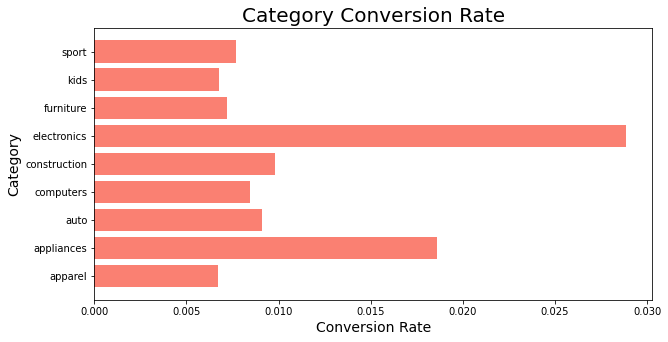

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_category['category'], df_merge_category['conversion_rate'], color='salmon')  
ax.set_title("Category Conversion Rate", fontsize=20) 
ax.set_xlabel('Conversion Rate', fontsize=14)  
ax.set_ylabel('Category', fontsize=14)  


## 10. Show the top **brand** in smartphone **subcategory** with highest conversion rate **(total purchase/total view)** all time

In [ ]:
df_purchase_brand =df_ecommerce.loc[(df_ecommerce['subcategory'] == 'smartphone') & (df_ecommerce['event_type'] == 'purchase')].groupby('brand', as_index = False).agg(total_purchase = ('user_session', 'nunique'))

df_view_brand =df_ecommerce.loc[(df_ecommerce['subcategory'] == 'smartphone') & (df_ecommerce['event_type'] == 'view')].groupby('brand', as_index = False).agg(total_session_view = ('user_session', 'nunique'))

df_merge_brand = pd.merge(df_purchase_brand, df_view_brand,  how = 'inner', on= 'brand').sort_values('brand')

df_merge_brand['conversion_rate'] = df_merge_brand['total_purchase']/df_merge_brand['total_session_view']

In [ ]:
df_merge_brand

,brand,total_purchase,total_session_view,conversion_rate
0,apple,83,2248,0.036922
1,huawei,21,674,0.031157
2,nokia,1,53,0.018868
3,oneplus,1,47,0.021277
4,oppo,10,296,0.033784
5,samsung,106,2591,0.040911
6,sony,1,44,0.022727
7,tp-link,1,19,0.052632
8,xiaomi,27,1585,0.017035
9,zte,2,8,0.250000


**Notes**

---

* filter data df_ecommerce in event_type = purchase and subcategory = smartphone. group by brand and using aggregate function to count unique user_session (df_purchase_brand).
* filter data df_ecommerce in event_type = view and subcategory = smartphone. group by brand and using aggregate function to count unique (df_view_brand)
* then merge the df_purchase_brand and df_view_brand and count conversion rate (df_merge_brand['total_purchase']/df_merge_brand['total_session_view'])

from the chart we can see that the highest conversion rate is zte brand with conversion rate 0.25 and the lowest is xiaomi brand with conversion rate 0.017035


Text(0, 0.5, 'Brand')

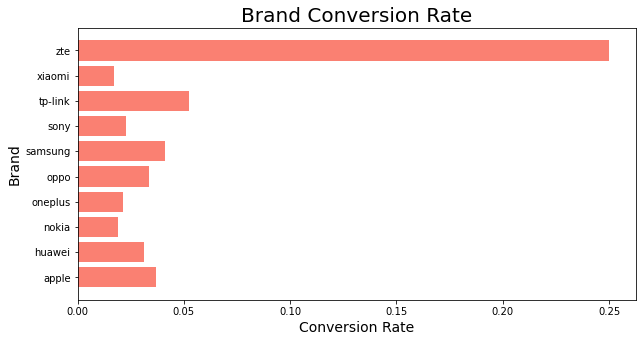

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_brand['brand'], df_merge_brand['conversion_rate'], color='salmon')  
ax.set_title("Brand Conversion Rate",fontsize=20 ) 
ax.set_xlabel('Conversion Rate', fontsize=14)  
ax.set_ylabel('Brand', fontsize=14)  


# Thanks a bunch!

Friska Ayu Listya Irawan

*   Email: friska.listya@gmail.com
*   linkedIn: https://www.linkedin.com/in/friskaayu/
